In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [22]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_rome_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('rome')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/rome_{date}.csv',index=False)
get_listings_rome_timeseries()

In [23]:
# pull in detailed_listings
raw_df_rome = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_rome)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(rome_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 25489 AirBnb listings.


In [24]:
rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
rome_raw_df_12_12_2020.shape





(28151, 16)

In [25]:
# use magic commands 'cd' to change directory
# use glob to locate all files for rome
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_rome = glob.glob('rome/**.csv')
files_rome

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['rome/Rome_2021-01.csv',
 'rome/Rome_2021-02.csv',
 'rome/Rome_2021-03.csv',
 'rome/Rome_2021-07.csv',
 'rome/Rome_2021-06.csv',
 'rome/Rome_2021-04.csv',
 'rome/Rome_2021-10.csv',
 'rome/Rome_2021-08.csv',
 'rome/Rome_2021-09.csv',
 'rome/Rome_2020-12.csv']

In [26]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(rome_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(rome_raw_df_12_12_2020['price'].mean(),2)}.")

rome_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(rome_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_1_9_2021['price'].mean(),2)}.")

rome_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(rome_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_2_8_2021['price'].mean(),2)}.")

rome_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(rome_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_3_4_2021['price'].mean(),2)}.")

rome_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(rome_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_4_9_2021['price'].mean(),2)}.")

#rome_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(rome_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_5_19_2021['price'].mean(),2)}.")

rome_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(rome_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_6_3_2021['price'].mean(),2)}.")

rome_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(rome_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_7_4_2021['price'].mean(),2)}.")

rome_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(rome_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_8_6_2021['price'].mean(),2)}.")

rome_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(rome_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_9_7_2021['price'].mean(),2)}.")

rome_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(rome_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_10_6_2021['price'].mean(),2)}.")

#rome_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(rome_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 28151 AirBnb listings; the avg price is €108.71.
The 1_9_2021 dataset contains 28024 AirBnb listings; the avg price is €105.14.
The 2_8_2021 dataset contains 27647 AirBnb listings; the avg price is €105.11.
The 3_4_2021 dataset contains 27433 AirBnb listings; the avg price is €109.61.
The 4_9_2021 dataset contains 27518 AirBnb listings; the avg price is €113.53.
The 6_3_2021 dataset contains 27126 AirBnb listings; the avg price is €116.16.
The 7_4_2021 dataset contains 27213 AirBnb listings; the avg price is €120.82.
The 8_6_2021 dataset contains 26877 AirBnb listings; the avg price is €122.9.
The 9_7_2021 dataset contains 26098 AirBnb listings; the avg price is €123.84.
The 10_6_2021 dataset contains 25490 AirBnb listings; the avg price is €127.01.


In [27]:
df_list_rome = [rome_raw_df_12_12_2020, rome_raw_df_1_9_2021, rome_raw_df_2_8_2021,
           rome_raw_df_3_4_2021, rome_raw_df_4_9_2021,  rome_raw_df_6_3_2021, rome_raw_df_7_4_2021,
           rome_raw_df_8_6_2021, rome_raw_df_9_7_2021, rome_raw_df_10_6_2021]

dates_rome = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_rome = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_rome = []

def airbnb_parse_rome(df_list, files):
    for file in files_rome:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_{file}.csv")
        print(f"The {file} rome dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_rome(df_list, dates):
    for file in files_rome:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_{file}.csv")
        #print(f"The {date} rome dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_rome.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_rome)

rome_parse = airbnb_parse_rome(df_list_rome, files_rome)


The 2020-12 rome dataset contains 28151 AirBnb listings -- the avg price is €108.71.
The 2021-01 rome dataset contains 28024 AirBnb listings -- the avg price is €105.14.
The 2021-02 rome dataset contains 27647 AirBnb listings -- the avg price is €105.11.
The 2021-03 rome dataset contains 27433 AirBnb listings -- the avg price is €109.61.
The 2021-04 rome dataset contains 27518 AirBnb listings -- the avg price is €113.53.
The 2021-06 rome dataset contains 27126 AirBnb listings -- the avg price is €116.16.
The 2021-07 rome dataset contains 27213 AirBnb listings -- the avg price is €120.82.
The 2021-08 rome dataset contains 26877 AirBnb listings -- the avg price is €122.9.
The 2021-09 rome dataset contains 26098 AirBnb listings -- the avg price is €123.84.
The 2021-10 rome dataset contains 25490 AirBnb listings -- the avg price is €127.01.


In [28]:
rome_summary = airbnb_to_frame_rome(df_list_rome, files_rome)
rome_summary['Date of scrape'] = pd.to_datetime(rome_summary['Date of scrape'])
rome_summary['City'] = 'Rome'
rome_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,28151,108.71,70.0,0,10571,1.15,Rome
1,2021-01-01,28024,105.14,65.0,0,10571,1.12,Rome
2,2021-02-01,27647,105.11,65.0,0,10571,1.09,Rome
3,2021-03-01,27433,109.61,69.0,0,10571,1.07,Rome
4,2021-04-01,27518,113.53,70.0,0,10571,1.03,Rome
5,2021-06-01,27126,116.16,73.0,0,10571,1.04,Rome
6,2021-07-01,27213,120.82,75.0,0,10571,1.06,Rome
7,2021-08-01,26877,122.90,75.0,0,10571,1.13,Rome
8,2021-09-01,26098,123.84,79.0,0,15400,1.18,Rome
9,2021-10-01,25490,127.01,80.0,0,11111,1.23,Rome


In [29]:
rome_summary_listings = rome_summary[['Date of scrape','# of Listings']]
rome_summary_listings.set_index('Date of scrape', inplace=True)


rome_summary_prices_avg = rome_summary[['Date of scrape', 'Avg Price']]
rome_summary_prices_avg.set_index('Date of scrape', inplace=True)

rome_summary_prices_median = rome_summary[['Date of scrape', 'Median Price']]
rome_summary_prices_median.set_index('Date of scrape', inplace=True)

rome_summary_reviews_permonth = rome_summary[['Date of scrape', 'Avg reviews per month']]
rome_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

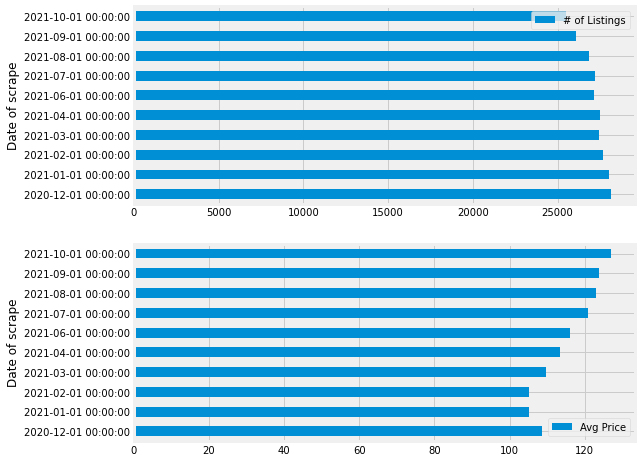

In [30]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

rome_summary_listings.plot(ax=ax1, kind='barh')
rome_summary_prices_avg.plot(ax=ax2, kind='barh')

In [31]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

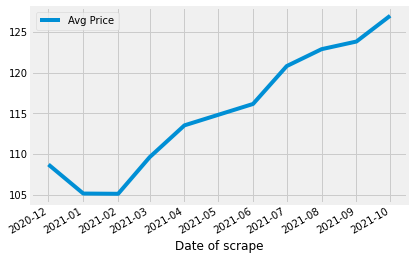

In [32]:
rome_summary.plot(x='Date of scrape', y='Avg Price')

In [153]:
master_df_rome = pd.concat(df_list_rome)
master_df_rome = master_df_rome[master_df_rome['room_type']=='Entire home/apt']
master_df_rome_unique = master_df_rome.drop_duplicates(subset='id')
#master_df_rome_unique = master_df_rome[master_df_rome_unique['room_type']=='Entire home/apt']
master_df_rome_unique['room_type'].value_counts()

Entire home/apt    21025
Name: room_type, dtype: int64

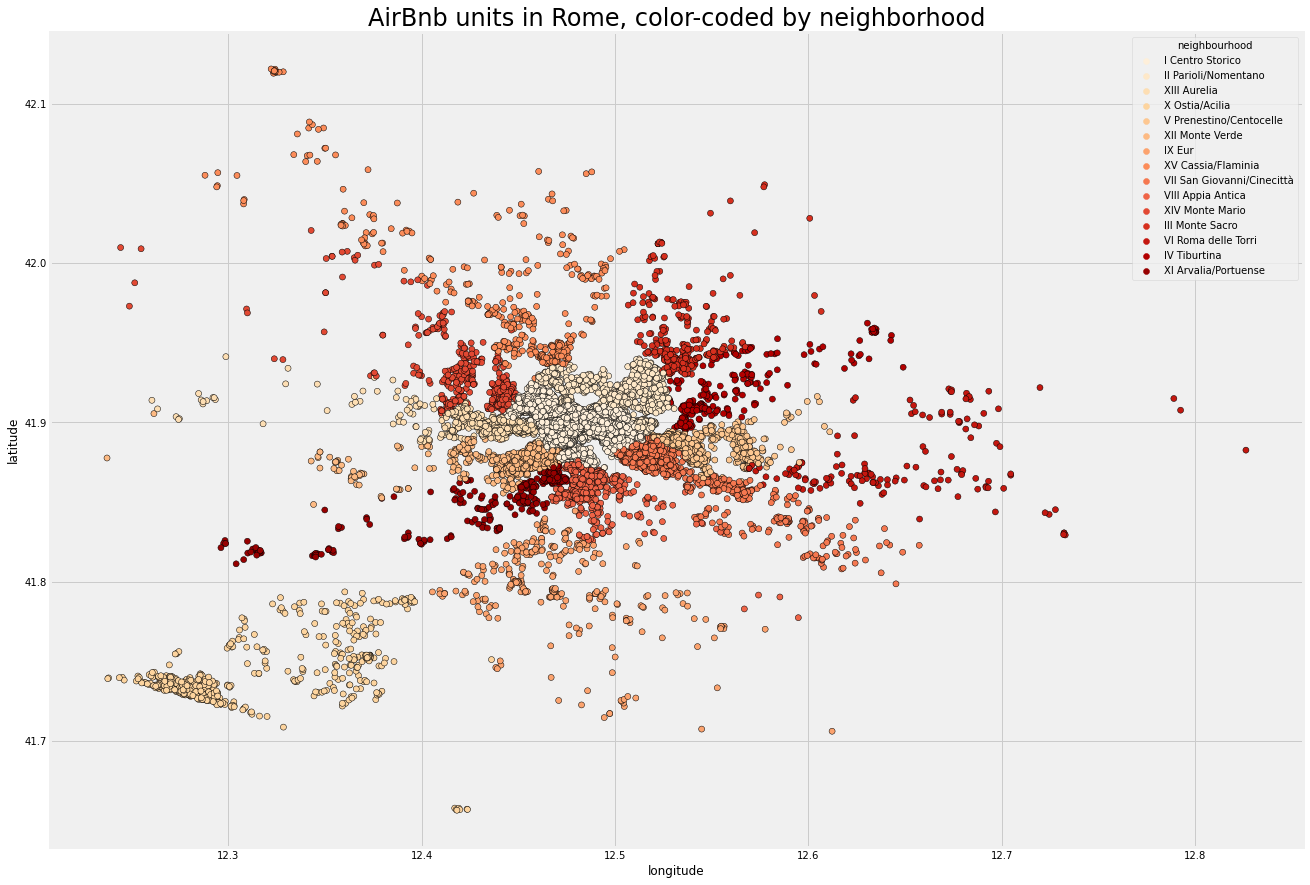

In [154]:
title = 'AirBnb units in Rome, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_rome_unique.longitude, master_df_rome_unique.latitude, hue = master_df_rome_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_rome.png')
plt.show()

## Add review data through a join

In [205]:
df_reviews = pd.concat([rome_raw_df_10_6_2021,raw_df_rome],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(16150, 75)

## Regression

In [204]:
#df_reviews_.columns

In [206]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [207]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -215.16770990906443
Coefficients:  [ 16.63644955  61.38890866 -11.35423264   0.5585682    3.37511576
  -8.03646432  16.86367969  70.87403776 -44.79633359]
LinearRegression()


In [208]:
y_pred2 = regr.predict(X_)

In [209]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(14008, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

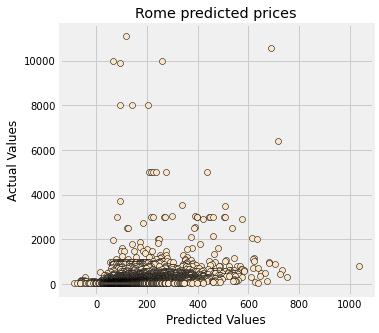

In [210]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [211]:
df_result.index

Int64Index([16907, 24357, 17317, 25099, 17854, 20720, 14545, 20369, 20104,
            20095,
            ...
            22991, 23886,  5325, 24069, 14729, 18869, 11780, 11487, 23306,
            23533],
           dtype='int64', length=14008)

In [212]:
raw_df_rome.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20211011151830,2021-10-12,"Elif's room in cozy, clean flat.","10 min by bus you can get to Piazza Venezia or Colosseum. All shops, gym, many trendy&local restaurants and cafes walking distance. <br />30min from beaches of Ostia and Fiumicino airport by direct train. <br />5 min away from metro B line Piramide stop.<br />EATALY is 5 min walking away where you can eat and shop the most quality Italian food from 9 am to midnight.<br />There is big supermarket open 7/24m just 2 min walking.<br /><br /><b>The space</b><br />Very comfortable, clean and cozy flat in the new trendy neighborhood of Ostiense.<br /><br /><b>Guest access</b><br />You can cook and prepare your meals, do your laundry, navigate in internet in your own computer.<br /><br /><b>Other things to note</b><br />There are several excellent and very famous pasticeria near by where you can have Italian breakfast with fresh cornetto and cappuccino. <br />Eataly is open all day till midnight to eat and shop where you can get in 5 min walking. There are many other very good places that you","It used to be an industrial area until late 80s. <br />Now all the factories have became museums, cultural centers, shops, restaurants, university buildings. <br />It's next to well known Testaccio, Garbatella, Aventino, S.Saba and S.Paolo. <br />It's quite lively especially weekend nights. <br />You can have great time in the excellently located flat. <br />Capitolino Museums and Basilica di S.Paolo which is one of the four big churches of Rome is 15 min walking distance. <br />The only Roman Piramid left from Roman times is just around the corner, next to Protestant cemetery which is one of the most poetic place to visit in the city. There is lovely small museum with free entrance on the Porta San Paolo.",https://a0.muscache.com/pictures/41225252/e9553eba_original.jpg,3047,https://www.airbnb.com/users/show/3047,...,5.00,4.40,4.40,NaN,f,5,0,5,0,0.08
1,2903,https://www.airbnb.com/rooms/2903,20211011151830,2021-10-11,Stay a night in Calisto6 B&B Rome,"<b>The space</b><br />Calisto6 B&B is an Italian city style ""bed and breakfast"" in Rome offering accommodations with a warm ""bed and breakfast"" atmosphere in a centrally located, convenient location. It is the perfect place to experience daily life in a typically Roman setting. <br />The apartment is located in a circa 1400 three-story townhouse built in the architectural style of the much-loved italian renaissance style in rione Trastevere, close to the famous S. Maria in Trastevere Church and it feels the effects of all the emotions that this site arouses. <br /> <br />In Calisto6 B&B you will find a nice and refined environment personally created with great taste by the owner, thanks to his lenghty experience of architect. Even the smallest details have been taken care of with diligence. We offer charming rooms each with 12 foots ceilings and beautiful hardwood floors. All the rooms are characterized by a different style, decorated in soft color and fitted with fine parquette or ma",NaN,https://a0.muscache.com/pictures/6315103/3f4d33fa_original.jpg,3280,https://www.airbnb.com/users/show/3280,...,4.70,4.74,4.48,NaN,f,3,0,3,0,0.57
2,3079,https://www.airbnb.com/rooms/3079,20211011151830,2021-10-12,Cozy apartment (2-4)with Colisseum view,"With the view of the Colisseum from the front door and windows and within easy walking distance of the Imperial Forum the apartment is the perfect spot for spending an holiday in Rome.<br /><br /><b>The space</b><br />The apartment is located in one of Rome's most characteristic

In [213]:
df_result['id'] = df_result.index.values
df_result.shape

(14008, 4)

In [214]:
raw_df_rome.index.values
df_result.index.values

array([16907, 24357, 17317, ..., 11487, 23306, 23533])

In [215]:
df_result_merge = df_result.merge(raw_df_rome, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(25489, 77)

In [216]:
df_join = df_result.join(raw_df_rome, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                             0
Predicted                                          0
Diff                                               0
id_x                                               0
id_y                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2285
Length: 78, dtype: int64

In [217]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [218]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_rome = df_print[df_print['Predicted']>0]
df_print_rome.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
16907,16907,11111,"$11,111.00",116.133611,-10994.866389,https://www.airbnb.com/rooms/34129778,41.91035,12.47446,5,I Centro Storico,4.63,4.63,4.63,4.88,5.0,5.0,4.75,8
24357,24357,9999,$97.00,67.271301,-9931.728699,https://www.airbnb.com/rooms/50783820,41.89998,12.49689,3,I Centro Storico,4.60,4.50,4.40,4.50,4.3,4.8,4.50,10
17317,17317,10571,"$10,571.00",686.990636,-9884.009364,https://www.airbnb.com/rooms/35081594,41.90392,12.48295,16,I Centro Storico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25099,25099,9900,$210.00,95.459087,-9804.540913,https://www.airbnb.com/rooms/52119054,41.90731,12.47933,2,I Centro Storico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
17854,17854,10000,"$10,000.00",259.833755,-9740.166245,https://www.airbnb.com/rooms/36350148,41.89394,12.48887,6,I Centro Storico,5.00,5.00,5.00,5.00,5.0,5.0,4.00,1


In [219]:
df_print_rome['neighbourhood_cleansed'].value_counts()

I Centro Storico              8424
II Parioli/Nomentano           898
VII San Giovanni/Cinecittà     871
XIII Aurelia                   853
XII Monte Verde                694
X Ostia/Acilia                 361
VIII Appia Antica              337
V Prenestino/Centocelle        313
XIV Monte Mario                250
XV Cassia/Flaminia             221
XI Arvalia/Portuense           195
IX Eur                         167
III Monte Sacro                158
IV Tiburtina                   156
VI Roma delle Torri             68
Name: neighbourhood_cleansed, dtype: int64

In [220]:
df_print_rome_final = df_print_rome.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_rome_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [221]:
df_rome_query = df_print_rome_final.query('number_of_reviews >11 & accommodates <=6')
df_rome_query.shape
#df_rome_query.head()

(6739, 18)

In [222]:
df_rome_query_filter = df_rome_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_rome_query_filter.shape


(3731, 18)

In [223]:
df_rome_query_filter.shape

(3731, 18)

In [224]:
df_neighborhood_plot = df_print_rome_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
0,I Centro Storico,158.729674
14,XV Cassia/Flaminia,138.524476
12,XIII Aurelia,122.503497
3,IV Tiburtina,120.641509
6,VI Roma delle Torri,117.697674
1,II Parioli/Nomentano,115.565093
4,IX Eur,114.473214
11,XII Monte Verde,104.699454
7,VII San Giovanni/Cinecittà,102.640227
13,XIV Monte Mario,102.585492


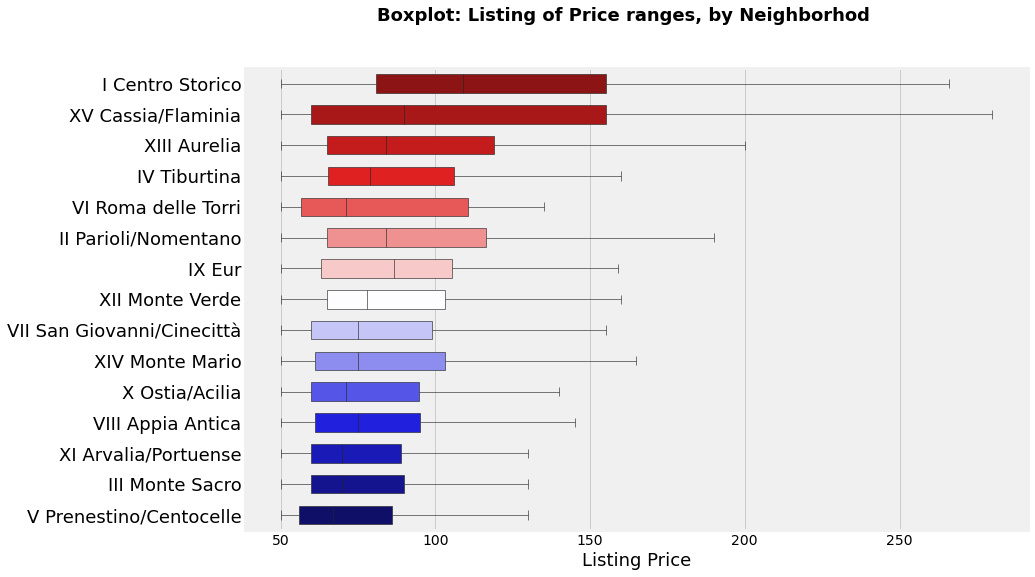

In [225]:
df_neighborhood_plot = df_print_rome_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_rome_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

fig.savefig('rome_neighborhood_boxplot.png')

In [176]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [226]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_rome)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 25489 files in the dataset
There is 9804 to be regressed with accommodates <=4


In [227]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  -60.564849589704906
Coefficients:  [  3.91494691  33.76366306  -3.3057781    0.29385961   1.03490863
 -15.00470279   2.99324587  47.31475856 -13.82915565]
LinearRegression()


In [228]:
y_pred2_4 = regr4.predict(X_4)

In [229]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(8559, 3)

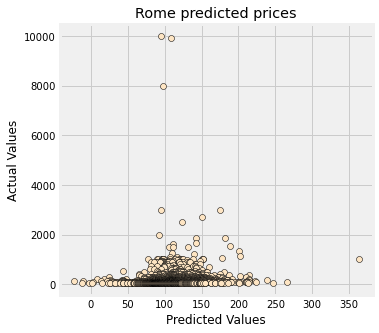

In [230]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [231]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_rome)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 25489 files in the dataset
There is 2844 to be regressed with accommodates <=2


In [232]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -98.0538068817402
Coefficients:  [ -2.29538901  61.3177365   -3.9881597    0.5695782   -5.61759175
  -3.71761013  14.25166071  34.77534453 -15.30927015]
LinearRegression()


In [233]:
y_pred2_2 = regr2.predict(X_2)

In [234]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(2299, 3)

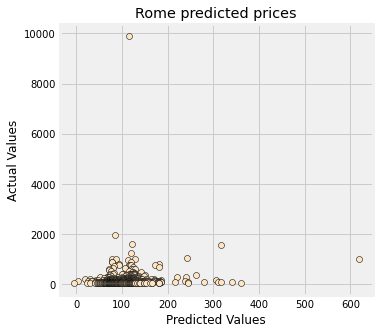

In [235]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [236]:
## Regression fucntion, rooms for 2 or less

In [237]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_rome)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 25489 files in the dataset
There is 13586 to be regressed with accommodates <=6


In [238]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  -130.00764048608164
Coefficients:  [ 10.27602626  36.32772616  -7.21452786   0.36584095   4.19579799
  -6.06989586  11.22957161  64.97868102 -41.37694469]
LinearRegression()


In [239]:
y_pred6_6 = regr6.predict(X_6)

In [240]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(12166, 3)

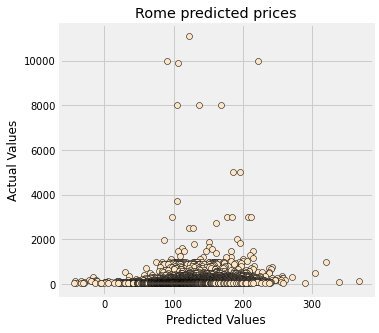

In [241]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [242]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_rome)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 25489 files in the dataset
There is 15443 to be regressed


In [243]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  -215.16770990906443
Coefficients:  [ 16.63644955  61.38890866 -11.35423264   0.5585682    3.37511576
  -8.03646432  16.86367969  70.87403776 -44.79633359]
LinearRegression()


In [244]:
y_predall_all = regrall.predict(X_all)

In [245]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(14008, 3)

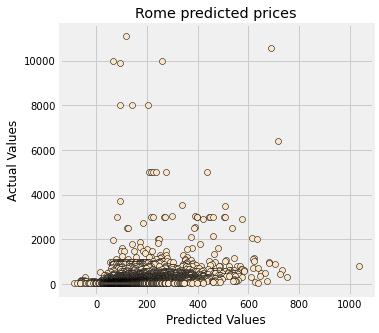

In [246]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [247]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
2,3079,Entire rental unit,Entire home/apt,4.0,1.0,4.0,100,55.0,4.47,4.32,4.58,4.79,4.37
3,11834,Entire rental unit,Entire home/apt,2.0,1.0,1.0,90,65.0,4.74,4.76,4.87,4.98,4.68
4,12398,Entire rental unit,Entire home/apt,5.0,2.0,3.0,63,0.0,4.89,4.85,4.90,4.85,4.85
6,15409,Entire rental unit,Entire home/apt,10.0,2.0,16.0,100,90.0,4.50,4.00,5.00,4.50,4.50
8,19965,Entire rental unit,Entire home/apt,6.0,2.0,4.0,70,50.0,4.52,4.53,4.35,4.84,4.55


In [248]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  -215.16770990906443
Coefficients:  [ 16.63644955  61.38890866 -11.35423264   0.5585682    3.37511576
  -8.03646432  16.86367969  70.87403776 -44.79633359]
Intercept:  -98.0538068817402
Coefficients:  [ -2.29538901  61.3177365   -3.9881597    0.5695782   -5.61759175
  -3.71761013  14.25166071  34.77534453 -15.30927015]
Intercept:  -60.564849589704906
Coefficients:  [  3.91494691  33.76366306  -3.3057781    0.29385961   1.03490863
 -15.00470279   2.99324587  47.31475856 -13.82915565]
Intercept:  -130.00764048608164
Coefficients:  [ 10.27602626  36.32772616  -7.21452786   0.36584095   4.19579799
  -6.06989586  11.22957161  64.97868102 -41.37694469]


## Find the highest predicted in Rome - <= 4

In [304]:
df_rome_query_filter['% Diff'] = (df_rome_query_filter['Price']/df_rome_query_filter['Predicted']-1)* 100
df_rome_query_filter.rename(columns={'id_x':'id',
                                     #'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_rome_query_final = df_rome_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy',
       'cleanliness',
       'location',
       'value','neighborhood','listing_url',
        'accommodates',
        'number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_rome_query_final)} listings that meet criteria')
df_rome_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head()

Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 3731 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
15866,53,346.43,-84.70,4.58,4.64,4.75,4.80,4.56,I Centro Storico,https://www.airbnb.com/rooms/32097316,2,55
3489,209,269.01,-22.31,4.95,4.97,4.95,4.98,4.91,I Centro Storico,https://www.airbnb.com/rooms/5036702,4,64
12896,80,246.42,-67.53,4.60,4.67,4.69,4.98,4.60,I Centro Storico,https://www.airbnb.com/rooms/24464233,4,45
8379,500,232.01,115.51,5.00,4.94,4.94,5.00,5.00,I Centro Storico,https://www.airbnb.com/rooms/14927534,4,17
4689,3000,215.24,1293.78,4.89,4.94,4.97,4.91,4.94,I Centro Storico,https://www.airbnb.com/rooms/7121143,4,37


## Find the best deal in Rome - <=4

In [281]:
df_rome_query_final[df_rome_query_final['Actual']<200].sort_values(by=['% Diff'], ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2}).head()


,id_x,Actual,Predicted,Diff,% Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
15866,15866,53,346.43,293.43,-84.70,https://www.airbnb.com/rooms/32097316,41.90797,12.49351,2,I Centro Storico,4.58,4.64,4.75,4.76,4.84,4.80,4.56,55
11704,11704,50,177.30,127.30,-71.80,https://www.airbnb.com/rooms/22013111,41.90915,12.54440,4,IV Tiburtina,4.79,4.81,4.85,4.87,4.87,4.58,4.67,52
18971,18971,50,176.45,126.45,-71.66,https://www.airbnb.com/rooms/39122616,41.88126,12.56257,4,V Prenestino/Centocelle,4.87,4.93,4.93,4.93,4.93,4.80,4.87,15
13793,13793,50,161.30,111.30,-69.00,https://www.airbnb.com/rooms/26828342,41.89666,12.46741,3,I Centro Storico,4.56,4.67,4.62,4.90,4.84,4.92,4.53,50
6565,6565,56,173.99,117.99,-67.81,https://www.airbnb.com/rooms/11011761,41.86922,12.51598,4,VII San Giovanni/Cinecittà,4.70,4.90,4.95,4.95,5.00,4.80,4.95,21
